In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#load data
df=pd.read_csv('/content/bodyfat.csv')

In [6]:
#first look
print(df.shape)
print(df.head())
print(df.info())
print(df.describe())

(252, 15)
   Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  \
0   1.0708     12.3   23  154.25   67.75  36.2   93.1     85.2   94.5   59.0   
1   1.0853      6.1   22  173.25   72.25  38.5   93.6     83.0   98.7   58.7   
2   1.0414     25.3   22  154.00   66.25  34.0   95.8     87.9   99.2   59.6   
3   1.0751     10.4   26  184.75   72.25  37.4  101.8     86.4  101.2   60.1   
4   1.0340     28.7   24  184.25   71.25  34.4   97.3    100.0  101.9   63.2   

   Knee  Ankle  Biceps  Forearm  Wrist  
0  37.3   21.9    32.0     27.4   17.1  
1  37.3   23.4    30.5     28.9   18.2  
2  38.9   24.0    28.8     25.2   16.6  
3  37.3   22.8    32.4     29.4   18.2  
4  42.2   24.0    32.2     27.7   17.7  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   A

In [7]:
#check for missing values
print(df.isnull().sum())

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64


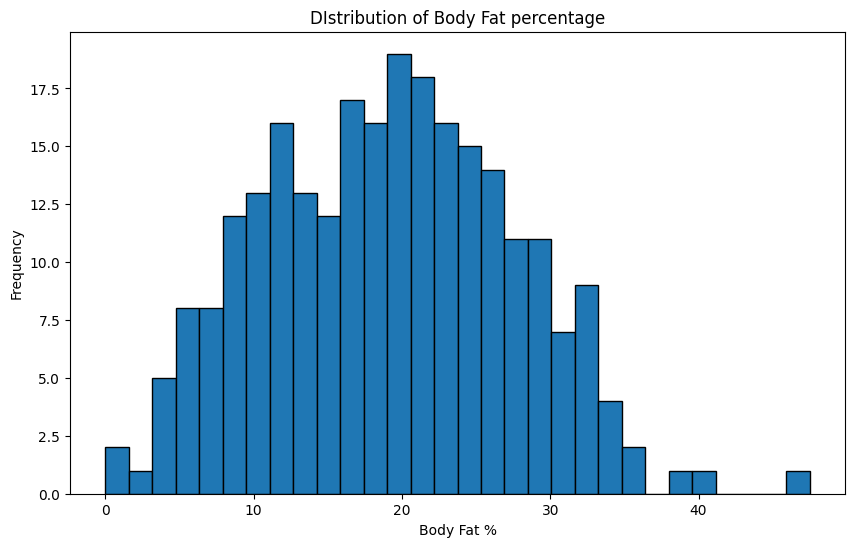

In [8]:
#Target variable distribution
plt.figure(figsize=(10,6))
plt.hist(df['BodyFat'],bins=30,edgecolor='black')
plt.xlabel('Body Fat %')
plt.ylabel('Frequency')
plt.title('DIstribution of Body Fat percentage')
plt.show()

In [13]:
#Find suspicous rows
print("Rows with body fat < 5% (almost impossible): ")
print(df[df['BodyFat'] < 5])
print("\nRows with Body Fat > 45% (very rare): ")
print(df[df['BodyFat'] > 45])

Rows with body fat < 5% (almost impossible): 
     Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen   Hip  Thigh  \
8     1.0900      4.1   25  191.00   74.00  38.1  100.9     82.5  99.9   62.9   
25    1.0911      3.7   27  159.25   71.50  35.7   89.6     79.7  96.5   55.0   
28    1.0910      3.7   27  133.25   64.75  36.4   93.5     73.9  88.5   50.1   
49    1.0903      4.0   47  127.50   66.75  34.0   83.4     70.4  87.2   50.6   
54    1.0906      3.9   42  136.25   67.50  37.8   87.6     77.6  88.6   51.9   
170   1.0926      3.0   35  152.25   67.75  37.0   92.2     81.9  92.8   54.7   
171   1.0983      0.7   35  125.75   65.50  34.0   90.8     75.0  89.2   50.0   
181   1.1089      0.0   40  118.50   68.00  33.8   79.3     69.4  85.0   47.2   

     Knee  Ankle  Biceps  Forearm  Wrist  
8    38.3   23.8    35.9     31.1   18.2  
25   36.7   22.5    29.9     28.2   17.7  
28   34.5   21.3    30.5     27.9   17.2  
49   34.4   21.9    26.8     25.8   16.8  
54   34.9

In [ ]:
df

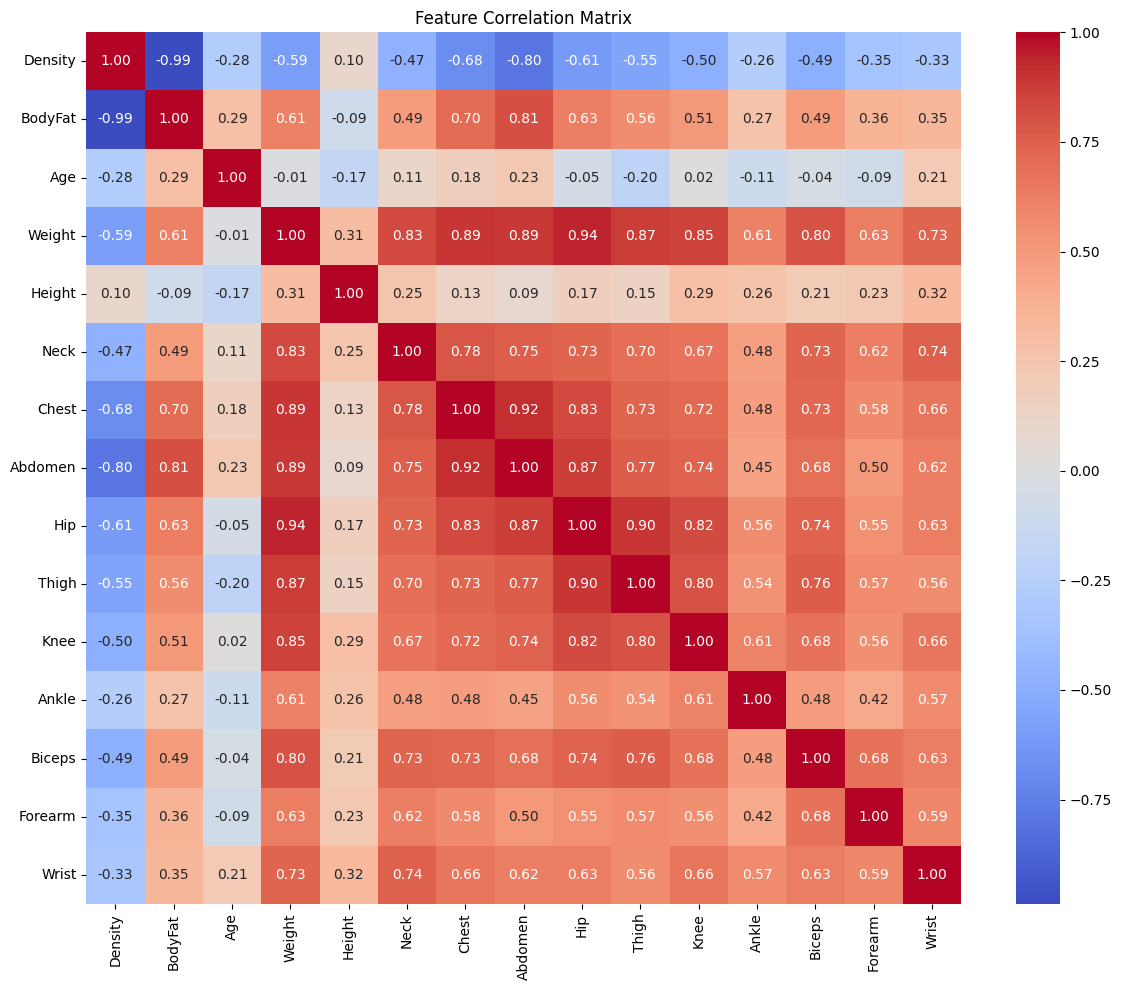

In [9]:
#Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()


In [10]:
#Identify top correlated features with BodyFat
correlations=df.corr()['BodyFat'].sort_values(ascending=False)
print("Top correlated features with BodyFat: ")
print(correlations)


Top correlated features with BodyFat: 
BodyFat    1.000000
Abdomen    0.813432
Chest      0.702620
Hip        0.625201
Weight     0.612414
Thigh      0.559608
Knee       0.508665
Biceps     0.493271
Neck       0.490592
Forearm    0.361387
Wrist      0.346575
Age        0.291458
Ankle      0.265970
Height    -0.089495
Density   -0.987782
Name: BodyFat, dtype: float64


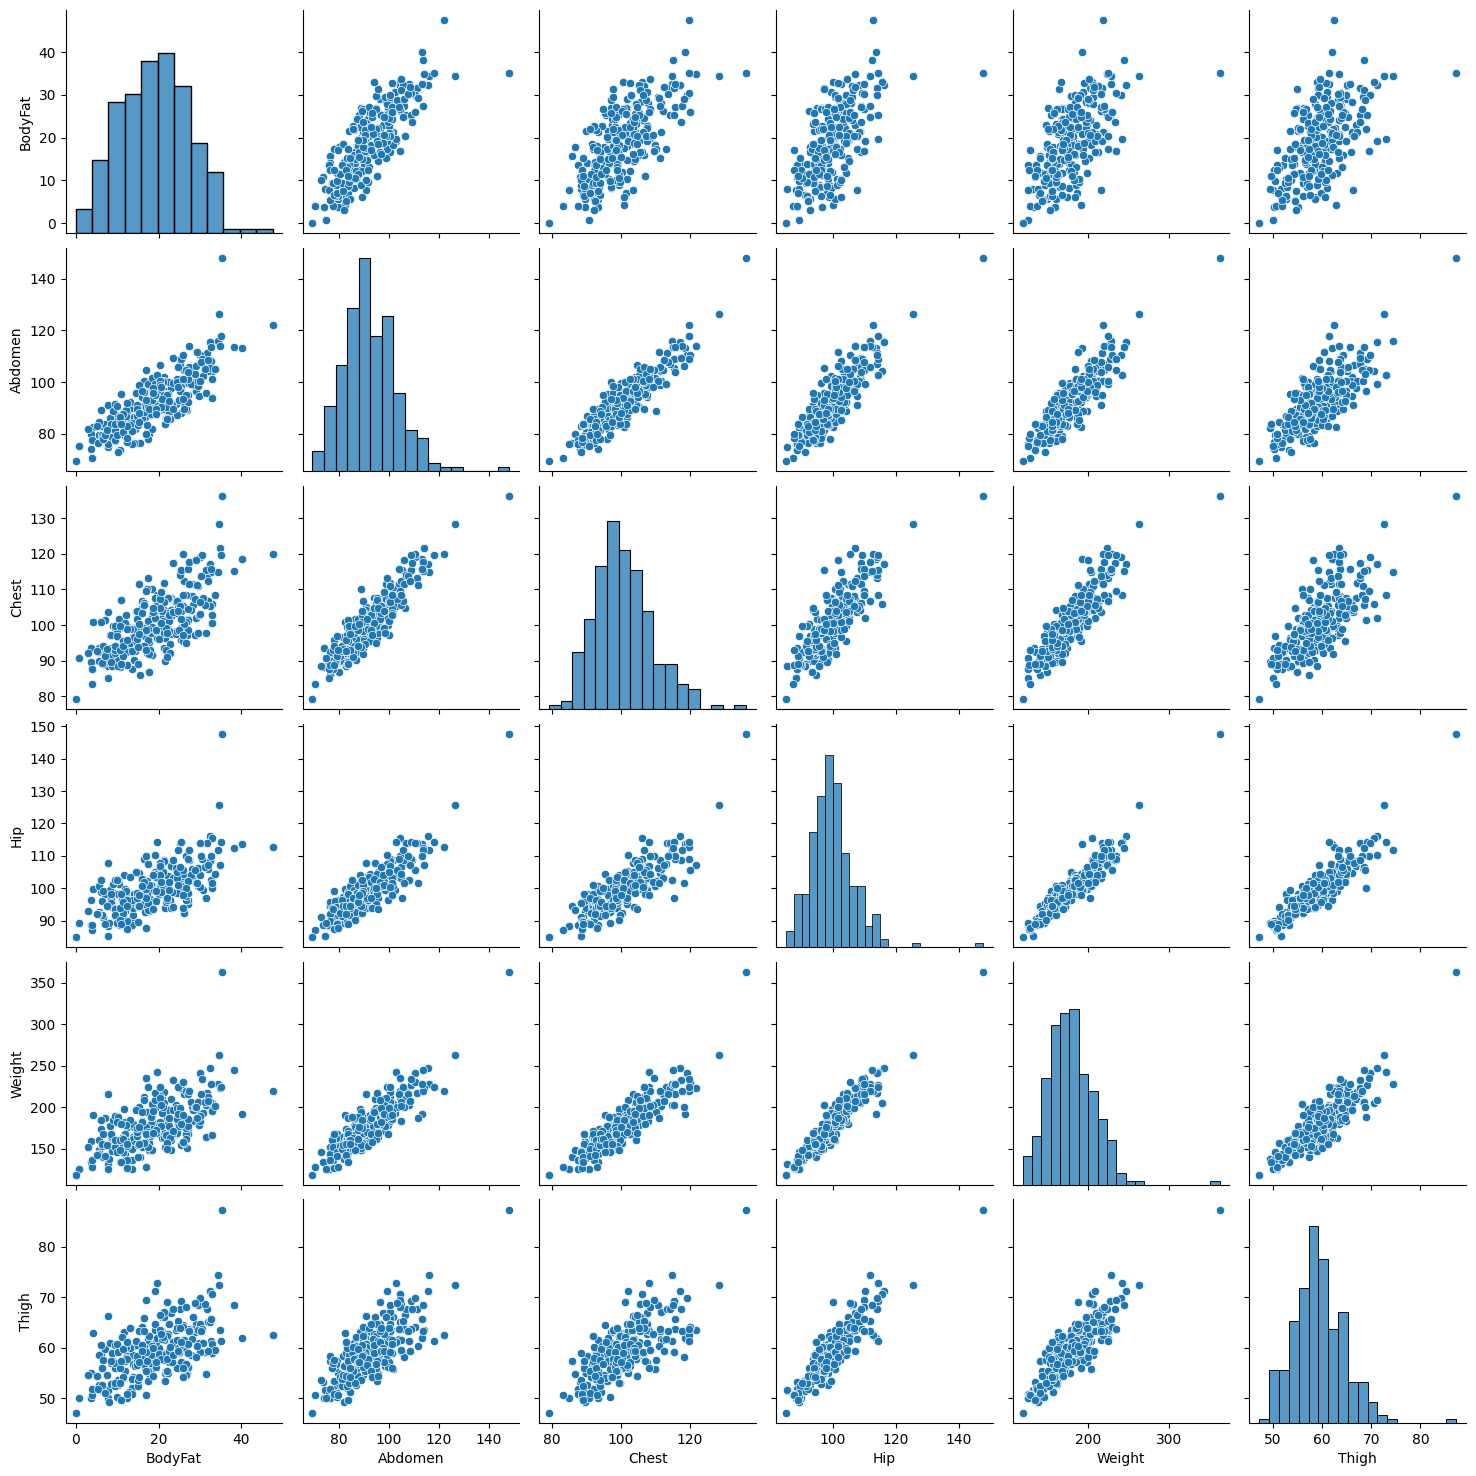

In [11]:
#Pairplot for top features
top_features=correlations.head(6).index.tolist()
sns.pairplot(df[top_features])
plt.show()

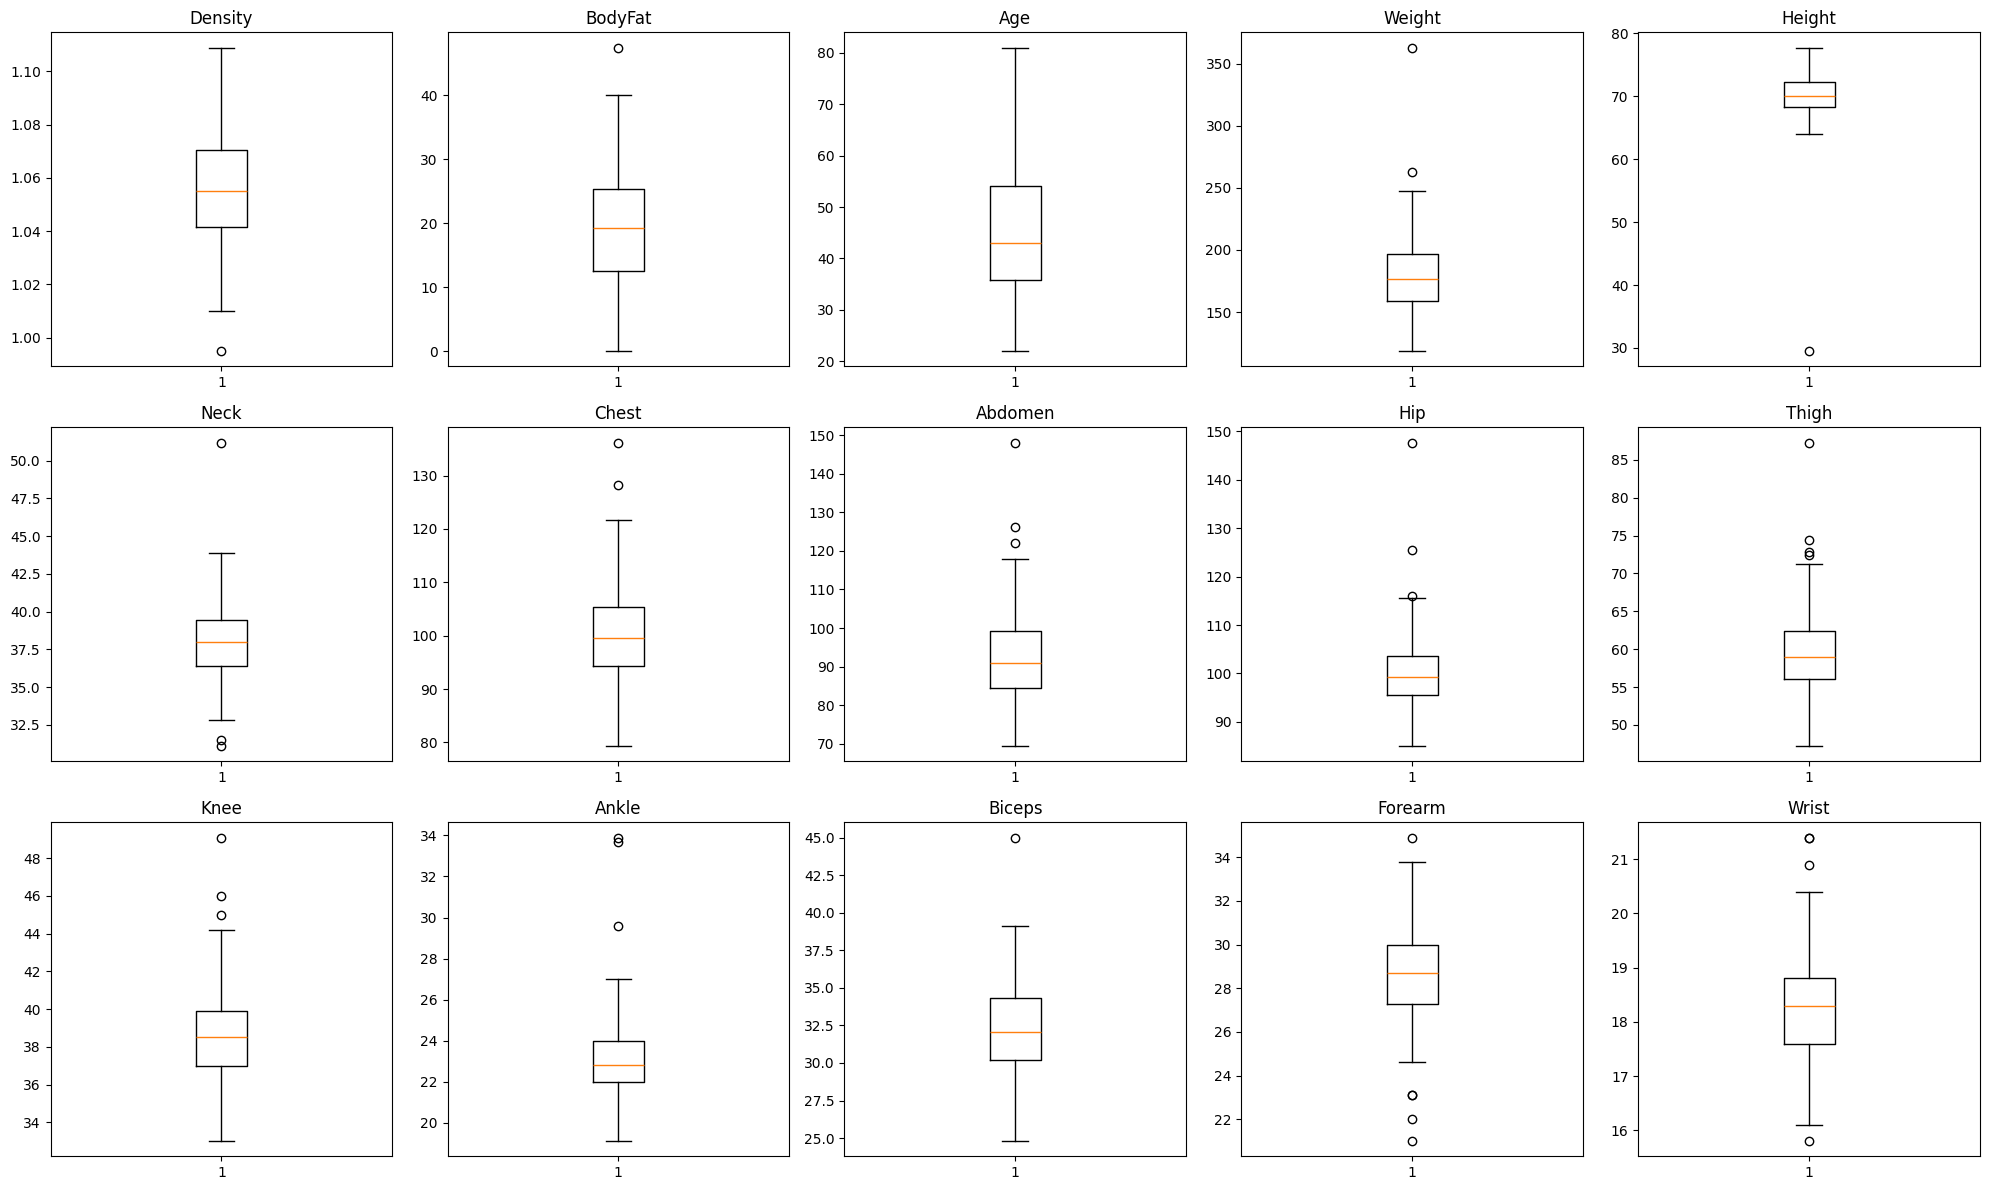

In [12]:
#Check for outliers
fig, axes = plt.subplots(3,5,figsize=(20,12))
axes=axes.ravel()
for i, col in enumerate(df.columns):
    axes[i].boxplot(df[col])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()